<a href="https://colab.research.google.com/github/PRATHEEK1659/cloudp/blob/master/trafficsign_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

In [4]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [5]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [8]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

In [9]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [10]:
with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)
  with open("german-traffic-signs/valid.p",mode='rb') as validation:
    valid = pickle.load(validation)
    with open("german-traffic-signs/test.p",mode='rb') as testing:
      test = pickle.load(testing)

In [11]:
x_train , y_train=train['features'], train['labels']
x_validation , y_validation=valid['features'], valid['labels']
x_test , y_test =test['features'], test['labels']

In [12]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)
  

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=30


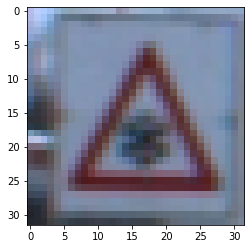

In [19]:
index=np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print("image label={}".format(y_train[index]))